In [41]:
from bayes_opt import BayesianOptimization
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from sklearn.preprocessing import Normalizer, MaxAbsScaler
from sklearn.model_selection import train_test_split
import pandas as pd

In [42]:
from bayes_opt.logger import JSONLogger
from bayes_opt.event import Events

In [43]:
%run SVR_MAPE_Library.ipynb

In [44]:
y1 =pd.read_excel(r'data//Data1.xlsx').set_index("fecha").loc["2007-01-01":"2020-03-30"]
X1 = pd.read_csv("data//X.csv")

X = X1.drop(["fecha"], axis = 1).to_numpy(); y = y1.to_numpy()

X, X_test, y, y_test = train_test_split(X, y, test_size = 40, shuffle = False)

scaler = MaxAbsScaler(); scaler.fit(X); X = scaler.transform(X)
X_test = scaler.transform(X_test)

scaler1 = MaxAbsScaler(); scaler1.fit(y); y = scaler1.transform(y).reshape(-1)

In [45]:
def bas_opt(C, epsilon, gamma):
    predict = SVR_general_cvxopt(kernel = "rbf", C = 0.5, epsilon = 5, error = 1e-1, gamma = 1/40).fit(X, y).predict(X_test)
    y_pred = scaler1.inverse_transform(predict.reshape(-1, 1))
    return -np.mean(np.abs((y_pred - y_test)/y_test))*100

In [46]:
# Bounded region of parameter space
pbounds = {'C': (0.1, 10), 'epsilon': (0.01, 10), 'gamma': (0.001, 0.1)}

# Bayes optimizer instantiation
optimizer = BayesianOptimization(f=bas_opt, pbounds=pbounds, random_state=1)

# keep data
logger = JSONLogger(path="./logs.json")
optimizer.subscribe(Events.OPTIMIZATION_STEP, logger)

# optimize
optimizer.maximize(init_points=3, n_iter=7)

In [ ]:
{"target": -2.220482105282553, "params": {"C": 0.11210574070258614, "epsilon": 9.877043166030695, "gamma": 0.03898104777178309}

In [36]:
-np.mean(np.abs((y_pred - y_test)/y_test))*100

-1.9611589887932035

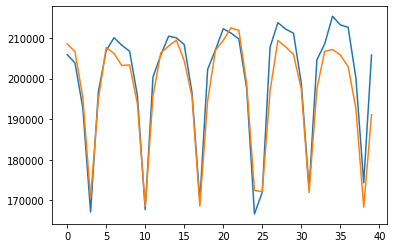

In [40]:
plt.plot(y_pred)
plt.plot(y_test)